In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
df = pd.read_csv("results.csv")
df

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
5,32.58,"Sumgong, Jemima Jelagat",4,82.45,F,29,140.68,F3,4,NaN,...,28,5.37,NaN,99.33,16.22,69.47,65.83,KEN,Nandi,132.95
6,17.65,"Hug, Marcel E.",4,47.67,M,28,84.65,W4,4,NaN,...,4,3.23,NaN,58.60,8.38,39.72,37.65,SUI,Neuenkirch,79.83
7,30.48,"Geneti, Markos",5,76.95,M,29,129.83,5,5,NaN,...,5,4.97,NaN,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80
8,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,NaN,...,3,3.10,NaN,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70
9,30.48,"Hall, Ryan",20,77.68,M,31,137.83,6,20,NaN,...,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83


In [14]:
X = df.iloc[:,[0,3,5,6,10,12,14,15,16,17,20]]
Y = pd.get_dummies(df.iloc[:,[4]])['gender_F']

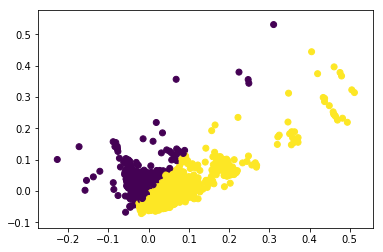

gender_F      0     1
row_0                
0         11706  6442
1          5911  7925


In [15]:
X = X.replace(to_replace="-", value=0)
X_norm = normalize(X)
X_pca = PCA(2).fit_transform(X_norm)
Y_pred = KMeans(n_clusters=2).fit_predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y_pred)
plt.show()
print(pd.crosstab(Y_pred, Y))

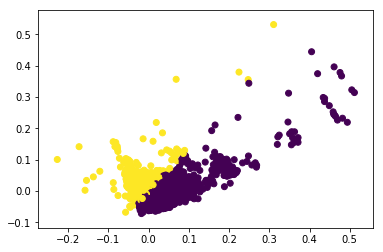

col_0      0      1
row_0              
0        665  13836
1      17483      0
gender_F      0     1
row_0                
0          6252  8249
1         11365  6118


In [16]:
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)
predict_mini = minibatchkmeans.predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predict_mini)
plt.show()
print(pd.crosstab(predict_mini, Y_pred))
print(pd.crosstab(predict_mini, Y))

In [17]:
from sklearn.cluster import MeanShift, estimate_bandwidth
len(X_pca)

31984

In [18]:
import numpy as np
bandwidth = estimate_bandwidth(X_pca, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_pca)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 32


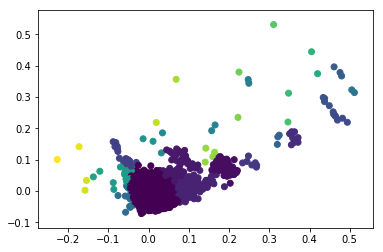

In [19]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.show()

In [20]:
df['cluster'] = labels
df.corr()

,division,age,official,genderdiv,overall,pace,cluster
division,1.000000,-0.577256,0.515368,0.470752,0.514493,0.515633,-0.054392
age,-0.577256,1.000000,0.166440,0.306829,0.201129,0.166593,0.088747
official,0.515368,0.166440,1.000000,0.878360,0.954233,0.999897,-0.021174
genderdiv,0.470752,0.306829,0.878360,1.000000,0.909206,0.878789,-0.030172
overall,0.514493,0.201129,0.954233,0.909206,1.000000,0.954765,-0.049137
pace,0.515633,0.166593,0.999897,0.878789,0.954765,1.000000,-0.023102
cluster,-0.054392,0.088747,-0.021174,-0.030172,-0.049137,-0.023102,1.000000


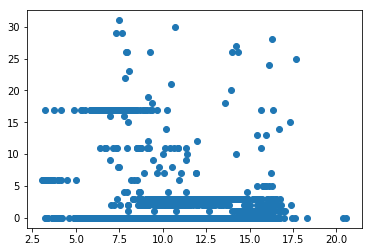

In [21]:
plt.scatter(df['pace'], df['cluster'])
plt.show()

In [36]:
countries = df['country'].unique()
country_int = []
for i in range(len(df)):
    for j in range(len(countries)):
        if df['country'][i] == countries[j]:
            country_int.append(j)

In [41]:
X = df.iloc[:,[0,3,5,6,10,12,14,15,16,17,20]]
Y = country_int
print(len(df['country'].unique()))

78


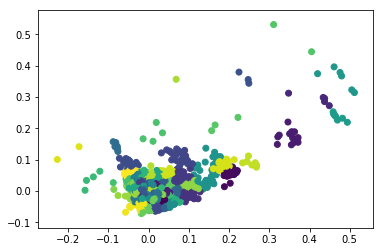

In [43]:
X = X.replace(to_replace="-", value=0)
X_norm = normalize(X)
X_pca = PCA(2).fit_transform(X_norm)
Y_pred = KMeans(n_clusters=78).fit_predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y_pred)
plt.show()

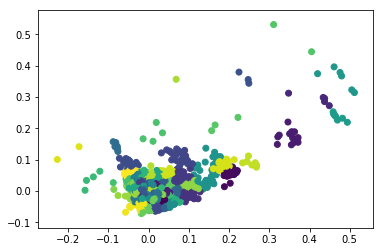

In [48]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y_pred)
plt.show()

In [45]:
Y

[0,
 1,
 2,
 3,
 0,
 1,
 4,
 3,
 0,
 5,
 1,
 1,
 6,
 1,
 7,
 5,
 8,
 3,
 9,
 10,
 1,
 11,
 1,
 8,
 7,
 3,
 12,
 5,
 1,
 1,
 5,
 3,
 1,
 8,
 5,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 7,
 5,
 5,
 5,
 0,
 5,
 5,
 5,
 13,
 5,
 14,
 5,
 5,
 3,
 15,
 0,
 15,
 5,
 5,
 16,
 5,
 5,
 5,
 16,
 16,
 5,
 5,
 5,
 8,
 5,
 5,
 5,
 5,
 5,
 7,
 5,
 5,
 5,
 1,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 0,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 0,
 5,
 5,
 5,
 5,
 7,
 5,
 0,
 5,
 5,
 5,
 5,
 5,
 5,
 10,
 5,
 5,
 5,
 5,
 17,
 5,
 5,
 5,
 5,
 17,
 5,
 5,
 5,
 5,
 5,
 18,
 5,
 5,
 5,
 0,
 5,
 5,
 19,
 5,
 5,
 4,
 5,
 5,
 5,
 7,
 5,
 7,
 5,
 20,
 5,
 5,
 5,
 5,
 7,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 7,
 5,
 5,
 5,
 5,
 21,
 5,
 5,
 5,
 22,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 20,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 7,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 

In [46]:
Y_pred

array([27, 46, 27, ..., 17, 60, 46], dtype=int32)